In [1]:
import os
data_path = os.path.expanduser('~')+"\\AppData\\Local\\Google\\Chrome\\User Data\Default"
files = os.listdir(data_path)
history_db = os.path.join(data_path, 'history')

In [2]:
import sqlite3
c = sqlite3.connect(history_db)
cursor = c.cursor()
select_statement = "SELECT urls.url, urls.visit_count FROM urls, visits WHERE urls.id = visits.url;"
cursor.execute(select_statement)

results = cursor.fetchall()

In [3]:
def parse(url):
	try:
		parsed_url_components = url.split('//')
		sublevel_split = parsed_url_components[1].split('/', 1)
		domain = sublevel_split[0].replace("www.", "")
		return domain
	except IndexError:
		print ("URL format error!")

In [4]:
sites_count = {} #dict makes iterations easier :D

for url, count in results:
	url = parse(url)
	if url in sites_count:
		sites_count[url] += 1
	else:
		sites_count[url] = 1

In [5]:
import operator
from collections import OrderedDict
sites_count_sorted = OrderedDict(sorted(sites_count.items(), key=operator.itemgetter(1), reverse=True))

In [6]:
from matplotlib import pyplot as plt
plt.bar(range(len(sites_count_sorted)), sites_count_sorted.values(), align='edge')
plt.xticks(rotation=45)
plt.xticks(range(len(sites_count_sorted)), sites_count_sorted.keys())
plt.show()

<Figure size 640x480 with 1 Axes>

[.] Type <c> to print or <p> to plot
[>] p


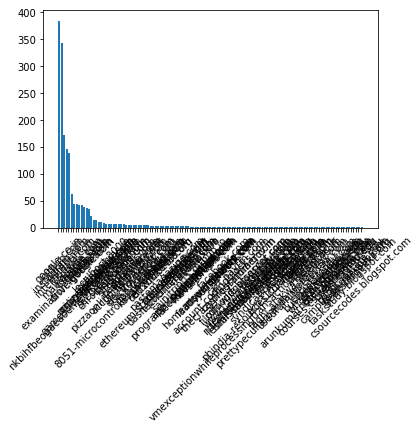

In [24]:
import os
import pandas as pd
import sqlite3
import operator
from collections import OrderedDict
import matplotlib.pyplot as plt

def parse(url):
	try:
		parsed_url_components = url.split('//')
		sublevel_split = parsed_url_components[1].split('/', 1)
		domain = sublevel_split[0].replace("www.", "")
		return domain
	except IndexError:
		print ("URL format error!")

def analyze(results):

	prompt = input("[.] Type <c> to print or <p> to plot\n[>] ")

	if prompt == "c":
		for site, count in sites_count_sorted.items():
			print (site, count)
	elif prompt == "p":
		plt.bar(range(len(results)), results.values(), align='edge')
		plt.xticks(rotation=45)
		plt.xticks(range(len(results)), results.keys())
		plt.show()
	else:
		print ("[.] Uh?")
		quit()

#path to user's history database (Chrome)
data_path = os.path.expanduser('~')+"\\AppData\\Local\\Google\\Chrome\\User Data\\Default"
files = os.listdir(data_path)

history_db = os.path.join(data_path, 'history')

#querying the db
c = sqlite3.connect(history_db)
cursor = c.cursor()
select_statement = "SELECT urls.url, urls.visit_count FROM urls, visits WHERE urls.id = visits.url;"
cursor.execute(select_statement)

results = cursor.fetchall() #tuple

sites_count = {} #dict makes iterations easier :D

url_each  = []
count_each = []

for url, count in results:
    url = parse(url)
    url_each.append(url)
    if url in sites_count:
        sites_count[url] += 1
        count_each.append(sites_count[url])
    else:
        sites_count[url] = 1
        count_each.append(sites_count[url])
        
sites_count_sorted = OrderedDict(sorted(sites_count.items(), key=operator.itemgetter(1), reverse=True))

analyze (sites_count_sorted)


In [9]:
sites_count_sorted

OrderedDict([('google.co.in', 385),
             ('instagram.com', 343),
             ('github.com', 173),
             ('internshala.com', 146),
             ('examination.igdtuw.ac.in', 138),
             ('vistaprint.in', 63),
             ('mail.google.com', 43),
             ('nkbihfbeogaeaoehlefnkodbefgpgknn', 43),
             ('youtube.com', 42),
             ('cobalten.com', 42),
             ('drive.google.com', 38),
             ('igdtuw.ac.in', 37),
             ('paytm.com', 34),
             ('game5562.debprize29.live', 21),
             ('imdb.com', 15),
             ('princetonreview.com', 15),
             ('online.pizzahut.co.in', 11),
             ('localhost:3000', 10),
             ('codingninjas.in', 8),
             ('codingblocks.com', 7),
             ('icicibank.com', 7),
             ('cs.colorado.edu', 7),
             ('securegw.paytm.in', 6),
             ('chrome.google.com', 6),
             ('pizzaonline.dominos.co.in', 6),
             ('8051-microcont

In [23]:
import json
data = json.dumps(sites_count_sorted, sort_keys  = True)
print(data)

{"": 4, "8051-microcontrollers.blogspot.com": 6, "academia.edu": 1, "account.codingblocks.com": 2, "accounts.google.com": 2, "accounts.paytm.com": 5, "amazon.com": 1, "answers.yahoo.com": 2, "app.codingblocks.com": 2, "arunkumarnotes.blogspot.com": 1, "babycenter.com": 5, "bmsit.ac.in": 1, "businessinsider.com": 1, "businessinsider.in": 3, "campus.barracuda.com": 1, "cart.paytm.com": 1, "cashlessindia.gov.in": 1, "ccs.neu.edu": 1, "cdn.ttgtmedia.com": 1, "cdn.widgetserver.com": 1, "chegg.com": 3, "chrome.google.com": 6, "circuitstoday.com": 1, "cobalten.com": 42, "code.cheraus.com": 1, "codingblocks.com": 7, "codingninjas.in": 8, "courses.cs.washington.edu": 1, "cs.colorado.edu": 7, "csourcecodes.blogspot.com": 1, "dash-poems.tumblr.com": 3, "dauniv.ac.in": 1, "delhi.gov.in": 3, "dominos.co.in": 1, "drive.google.com": 38, "ecb3103.weebly.com": 1, "ece-colorado.edu": 1, "ecee.colorado.edu": 1, "ee.sharif.edu": 1, "electrofriends.com": 5, "en.wikipedia.org": 3, "ethereum.stackexchange.co

In [10]:
maximum =max(sites_count_sorted, key = sites_count_sorted.get)
print(maximum)

google.co.in


In [11]:
url_each

['youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'youtube.com',
 'google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'mail.google.com',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',
 'examination.igdtuw.ac.in',


In [12]:
import numpy as np
url_each = np.array(url_each)

In [13]:
url_each

array(['youtube.com', 'youtube.com', 'youtube.com', ..., 'google.co.in',
       'google.co.in', 'examination.igdtuw.ac.in'], dtype='<U47')

In [14]:
unique , counts = np.unique(url_each, return_counts = True)
counts

array([  4,   6,   1,   2,   2,   5,   1,   2,   2,   1,   5,   1,   1,
         3,   1,   1,   1,   1,   1,   1,   3,   6,   1,  42,   1,   7,
         8,   1,   7,   1,   3,   1,   3,   1,  38,   1,   1,   1,   1,
         5,   3,   3, 138,   2,   2,   1,   1,  21,   1,   1, 173, 385,
         5,   1,   1,   2,   7,  37,  15,   1, 343, 146,   3,   1,   3,
         3,   1,   1,   4,  10,  43,   2,   2,   2,   1,  43,   1,   1,
         2,  11,   3,  34,   5,   6,   1,   2,   6,   1,  15,   3,   1,
         3,   3,   1,   1,   2,   3,   2,   2,   1,   1,   6,   5,   5,
         1,   4,   1,   1,   3,   2,   1,   1,   3,   1,   1,  63,   1,
         1,   1,   1,   1,   2,  42], dtype=int64)

In [15]:
import pandas as pd
count = pd.DataFrame()

In [16]:
arr = np.asarray((unique, counts)).T

In [17]:
arr

array([['', '4'],
       ['8051-microcontrollers.blogspot.com', '6'],
       ['academia.edu', '1'],
       ['account.codingblocks.com', '2'],
       ['accounts.google.com', '2'],
       ['accounts.paytm.com', '5'],
       ['amazon.com', '1'],
       ['answers.yahoo.com', '2'],
       ['app.codingblocks.com', '2'],
       ['arunkumarnotes.blogspot.com', '1'],
       ['babycenter.com', '5'],
       ['bmsit.ac.in', '1'],
       ['businessinsider.com', '1'],
       ['businessinsider.in', '3'],
       ['campus.barracuda.com', '1'],
       ['cart.paytm.com', '1'],
       ['cashlessindia.gov.in', '1'],
       ['ccs.neu.edu', '1'],
       ['cdn.ttgtmedia.com', '1'],
       ['cdn.widgetserver.com', '1'],
       ['chegg.com', '3'],
       ['chrome.google.com', '6'],
       ['circuitstoday.com', '1'],
       ['cobalten.com', '42'],
       ['code.cheraus.com', '1'],
       ['codingblocks.com', '7'],
       ['codingninjas.in', '8'],
       ['courses.cs.washington.edu', '1'],
       ['cs.colorado.ed

In [18]:
arr[arr[:, 1].argsort()]

array([['geeksforgeeks.org', '1'],
       ['ecb3103.weebly.com', '1'],
       ['ece-colorado.edu', '1'],
       ['ecee.colorado.edu', '1'],
       ['ee.sharif.edu', '1'],
       ['tv.com', '1'],
       ['fadhl-alakwa.weebly.com', '1'],
       ['filmfoodie.blogspot.com', '1'],
       ['gateoverflow.in', '1'],
       ['timeout.com', '1'],
       ['guce.yahoo.com', '1'],
       ['hilarymak.wordpress.com', '1'],
       ['infinity.icicibank.com', '1'],
       ['irist.iust.ac.ir', '1'],
       ['lesmiserables.fandom.com', '1'],
       ['lesmiserables.wikia.com', '1'],
       ['taskstudy.blogspot.com', '1'],
       ['nitratediva.wordpress.com', '1'],
       ['syndication.exosrv.com', '1'],
       ['nptel.ac.in', '1'],
       ['omnisecu.com', '1'],
       ['sothebys.com', '1'],
       ['phindia-resources.cdn.martjack.io', '1'],
       ['scribd.com', '1'],
       ['prettypeculiarpanda.wordpress.com', '1'],
       ['public.iastate.edu', '1'],
       ['quora.com', '1'],
       ['ranker.com', '1']